In [1]:
#required packages

In [2]:
pip install tensorflow

     |████████████████████████████████| 421.8MB 91kB/s s eta 0:00:01  |▏                               | 1.9MB 4.0MB/s eta 0:01:46     |▍                               | 5.7MB 4.0MB/s eta 0:01:45     |█▉                              | 24.7MB 16.2MB/s eta 0:00:25     |██                              | 26.0MB 16.2MB/s eta 0:00:25     |█████████▎                      | 122.8MB 63.4MB/s eta 0:00:05     |█████████████████████▌          | 283.9MB 35.5MB/s eta 0:00:04     |██████████████████████████████▉ | 407.1MB 64.0MB/s eta 0:00:01     |███████████████████████████████ | 409.3MB 64.0MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 23.3MB/s eta 0:00:01                            | 266kB 23.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 20.5MB/s eta 0:00:01    |█████▏                          | 4.2MB 20.5MB/s eta 0:00:02
     |████████████████████████████████| 112kB 33.7MB/s eta 0:00:01
     |███

     |████████████████████████████████| 81kB 11.4MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.11.2-cp37-cp37m-linux_x86_64.whl size=70707 sha256=f8489dbae3b2d94336339d220ad78cf3434dfac41f7af167b8aa86d723bfb7e9
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=db90882ead082903ea96af1285d5ddde418408ab73f71cb3da58843aaae80d20
  Stored in directory: /home/jovyan/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121932 sha256=8f81629be9b0acb85cc7c9cd0bf0d792f032d5bee38bd8eae6b144eddcb1b703
  Stored in directory: /home/jovyan/.cache/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=867031641de71b1f0770f53714d3875513928d4c5

In [3]:
pip install keras

     |████████████████████████████████| 378kB 5.3MB/s eta 0:00:01
     |████████████████████████████████| 276kB 22.0MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3-cp37-cp37m-linux_x86_64.whl size=393351 sha256=dd9947b82656501124326c839e316ffe83cb34c0d655cca71b84d836719e3c47
  Stored in directory: /home/jovyan/.cache/pip/wheels/e4/76/4d/a95b8dd7b452b69e8ed4f68b69e1b55e12c9c9624dd962b191
Successfully built pyyaml
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

     |████████████████████████████████| 10.4MB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 512kB 22.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

     |████████████████████████████████| 13.1MB 4.1MB/s eta 0:00:01    |███████████████████████▌        | 9.6MB 4.1MB/s eta 0:00:01
     |████████████████████████████████| 92kB 15.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 14.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
#packages
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt

In [7]:
#read the train and the test datasets from the csv file and transform them into numpy arrays
train_data = pandas.read_csv("../datasets/train.csv").to_numpy()
test_data = pandas.read_csv("../datasets/test.csv").to_numpy()

In [8]:
#now that we have the data, as it's from 0..255, we want to make those values between 0 to 1
#doing this, it's easier for the neuronal network to learn
train_data_normalized = tf.keras.utils.normalize(train_data)
test_data_normalized = tf.keras.utils.normalize(test_data)

In [9]:
#check the length of the dataset(to see how can we split the data for train/test)
print("Train set length: ",len(train_data_normalized))
print("Test set length: ", len(test_data_normalized))

Train set length:  42000
Test set length:  28000


In [10]:
#get the train_set/test_set(reprezents the pixels from the image) 
#and the train_set_label/test_set_label(represents the correct numbers)
train_set = train_data_normalized[0:42000,1:]
train_set_label = train_data[0:42000,0]

test_set = test_data_normalized[0:28000,1:]
test_set_label = test_data[0:28000,0]

#NOTE
#As the data is normalized, the label was normalized as well. 
#We take the label value from the normal dataset(train_data/test_Data)

In [ ]:
#building the sequential 2d model
#NOTE
#in this case, our datasets are already flattened. We do not need to flattened it anymore
model = tf.keras.models.Sequential()
#now, we use a Dense(each input node is connected to each output node) layer with 128 neurons and 
#the activation function(this is what is gonna make the neuron to 'fire')

#first, we will apply the dense layer with ReLU(f(x) = max(0, x)) as activation function
#we will apply 2 dense layers.. enough for our data to not be under/overfitted
model.add(tf.keras.layers.Dense(128, imput_dim=784, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, imput_dim=784, activation = tf.nn.relu))
#now, add the last layer that has as activation function softmax. We use this because we need to change the received numbers
#from the previour layer into probabilities
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
#defining parameters used by the model to train the neural network
#optimizer: the optimizer used
#loss: the model will try it's best to minimize the loss.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

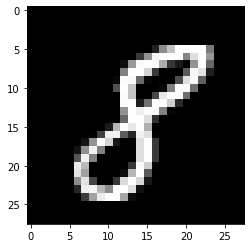

8

In [11]:
img = train_set[30]
img.shape=(28, 28)
plt.imshow(255 - img,cmap=plt.cm.binary)
plt.show()
train_set_label[30]